# Assignment on Text Mining assignment_Elon-musk 
 
Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [1]:
conda install -c conda-forge wordcloud 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


This is very important library to be installed since wordcloud gives us a lot of information in terms key highlighted features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import nltk
nltk.download('punkt')

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\senir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset
text=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
text.drop(['Unnamed: 0'],inplace=True,axis=1)
text

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Text Preprocessing

In [5]:
text=[Text.strip() for Text in text.Text] # remove both the leading and the trailing characters
text=[Text for Text in text if Text] # removes empty strings, because they are considered in Python as False
text[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

String .strip() is an inbuilt function in the Python programming language that returns a copy of the string with both leading and trailing characters removed (based on the string argument passed). 

In [6]:
# Joining the list into one string/text
text_text=' '.join(text)
text_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

This makes the value or the data in this case which is mentioned under text to use the .join() to joint two strings with the '' mentioned and save it all together into text_text

In [7]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
text_tokens=tknzr.tokenize(text_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

The tokenize module provides a lexical scanner for Python source code, implemented in Python. The scanner in this module returns comments as tokens as well, making it useful for implementing “pretty-printers”, including colorizers for on-screen displays.

To simplify token stream handling, all operator and delimiter tokens and Ellipsis are returned using the generic OP token type. The exact type can be determined by checking the exact_type property on the named tuple returned from tokenize.tokenize().

In [8]:
# Again Joining the list into one string/text
text_tokens_text=' '.join(text_tokens)
text_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

This makes the value or the data in this case which is mentioned under text_tokens to use the .join() to joint two strings with the '' mentioned and save it all together into text_tokens_text

In [9]:
# Remove Punctuations 
no_punc_text=text_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

.translate() as mentioned above removes the punctuations from the text_tokens_text by using str.maketrans() (method returns a mapping table that can be used with the translate() method to replace specified characters.)

In [10]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

Removal of unnecessary text in the string in the no_punc_text here in this case "https" and then to be stored in no_url_text

In [11]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

With the help of nltk.tokenize.word_tokenize() method, we are able to extract the tokens from string of characters by using tokenize.word_tokenize() method. It actually returns the syllables from a single word. A single word can contain one or two syllables.

In [12]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\senir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\senir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Tokens count
len(text_tokens)

17847

In [14]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [15]:
# Normalizing the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:300])

['once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missing', 'back', 'work', 'go', 'does', 'seem', 'bit', 'high', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow', '1', 'orbital', 'launch', 'tower', 'stack', '2', 'enough', 'raptors', 'orbit', 'booster', '3', 'improve', 'ship', 'booster', 'mass', 'back', 'work

In [16]:
# Stemming Data
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:300])

['onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'it', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', 'miss', 'back', 'work', 'go', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', 'wow', '1', 'orbit', 'launch', 'tower', 'stack', '2', 'enough', 'raptor', 'orbit', 'booster', '3', 'improv', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'ð', 'ðogecoin', 'instruct', 'video', 'the', 'peopl

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [17]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")


To load a model, use spacy.load () with the model name or a path to the model data directory. import spacy nlp = spacy.load("en_core_web_sm") doc = nlp("This is a sentence.") You can also import a model directly via its full name and then call its load () method with no arguments.

In [19]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping this intended earth 

In contrast to stemming, lemmatization is a lot more powerful. It looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words, aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:100])

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission']


In [21]:
clean_text=' '.join(lemmas)
clean_text

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar xprize team manage 100 m

This makes the value or the data in this case which is mentioned under lemmas to use the .join() to joint two strings with the '' mentioned and save it all together into clean_text

# Feature Extraction

In [22]:
#By using Countvertorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
textscv=vectorizer.fit_transform(lemmas)


CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

In [23]:
print(vectorizer.vocabulary_)

{'alien': 194, 'ray': 2347, 'trace': 3012, 'cyberpunk': 767, 'hdr': 1358, 'nextlevel': 1960, 'have': 1353, 'try': 3043, 'great': 1305, 'interview': 1556, 'doge': 890, 'underestimate': 3176, 'congratulation': 675, 'tesla': 2917, 'china': 584, 'amazing': 217, 'execution': 1057, 'last': 1640, 'year': 3392, 'now': 1988, 'next': 1959, 'even': 1031, 'happy': 1340, 'new': 1957, 'ox': 2089, 'frodo': 1207, 'underdoge': 3175, 'all': 197, 'thought': 2954, 'would': 3378, 'fail': 1091, 'himself': 1402, 'haha': 1328, 'thank': 2928, 'indeed': 1497, 'tweet': 3058, 'definitely': 804, 'represent': 2414, 'realworld': 2362, 'time': 2970, 'allocation': 199, 'the': 2933, 'entertaining': 1001, 'outcome': 2068, 'likely': 1695, 'just': 1598, 'send': 2557, 'agree': 179, 'clubhouse': 613, 'it': 1575, 'get': 1266, 'real': 2357, 'buy': 502, 'dogecoin': 892, 'lil': 1696, 'toddler': 2982, 'hodler': 1408, 'he': 1359, 'issue': 1574, 'sentencing': 2562, 'seem': 2549, 'bit': 418, 'high': 1393, 'fix': 1152, 'please': 218

vocabulary_ is a dict where keys are terms and values are indices in the feature matrix.

CountVectorizer converts a collection of text documents to a matrix of token counts. It produces a sparse Matrix of the counts of each word from the vocabulary. The Matrix shape is NxM (N is the number of documents (rows) and M is the size of the vocabulary (columns)). This numbers are simply indices of each word of the vocabulary in this matrix across columns.

In [24]:
print(vectorizer.get_feature_names()[100:300])
print(textscv.toarray()[100:300])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'aliens', 'align', 'all', 'allocati',

In [25]:
print(textscv.toarray().shape)

(11486, 3412)


# Let's see how can bigrams and trigrams can be included here

In [26]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [27]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'just', 'land', 'launch', 'like', 'look', 'lot', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'ok', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFidf vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock

Convert a collection of raw documents to a matrix of TF-IDF features.

Equivalent to CountVectorizer followed by TfidfTransformer.

# Generate wordcloud

In [29]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

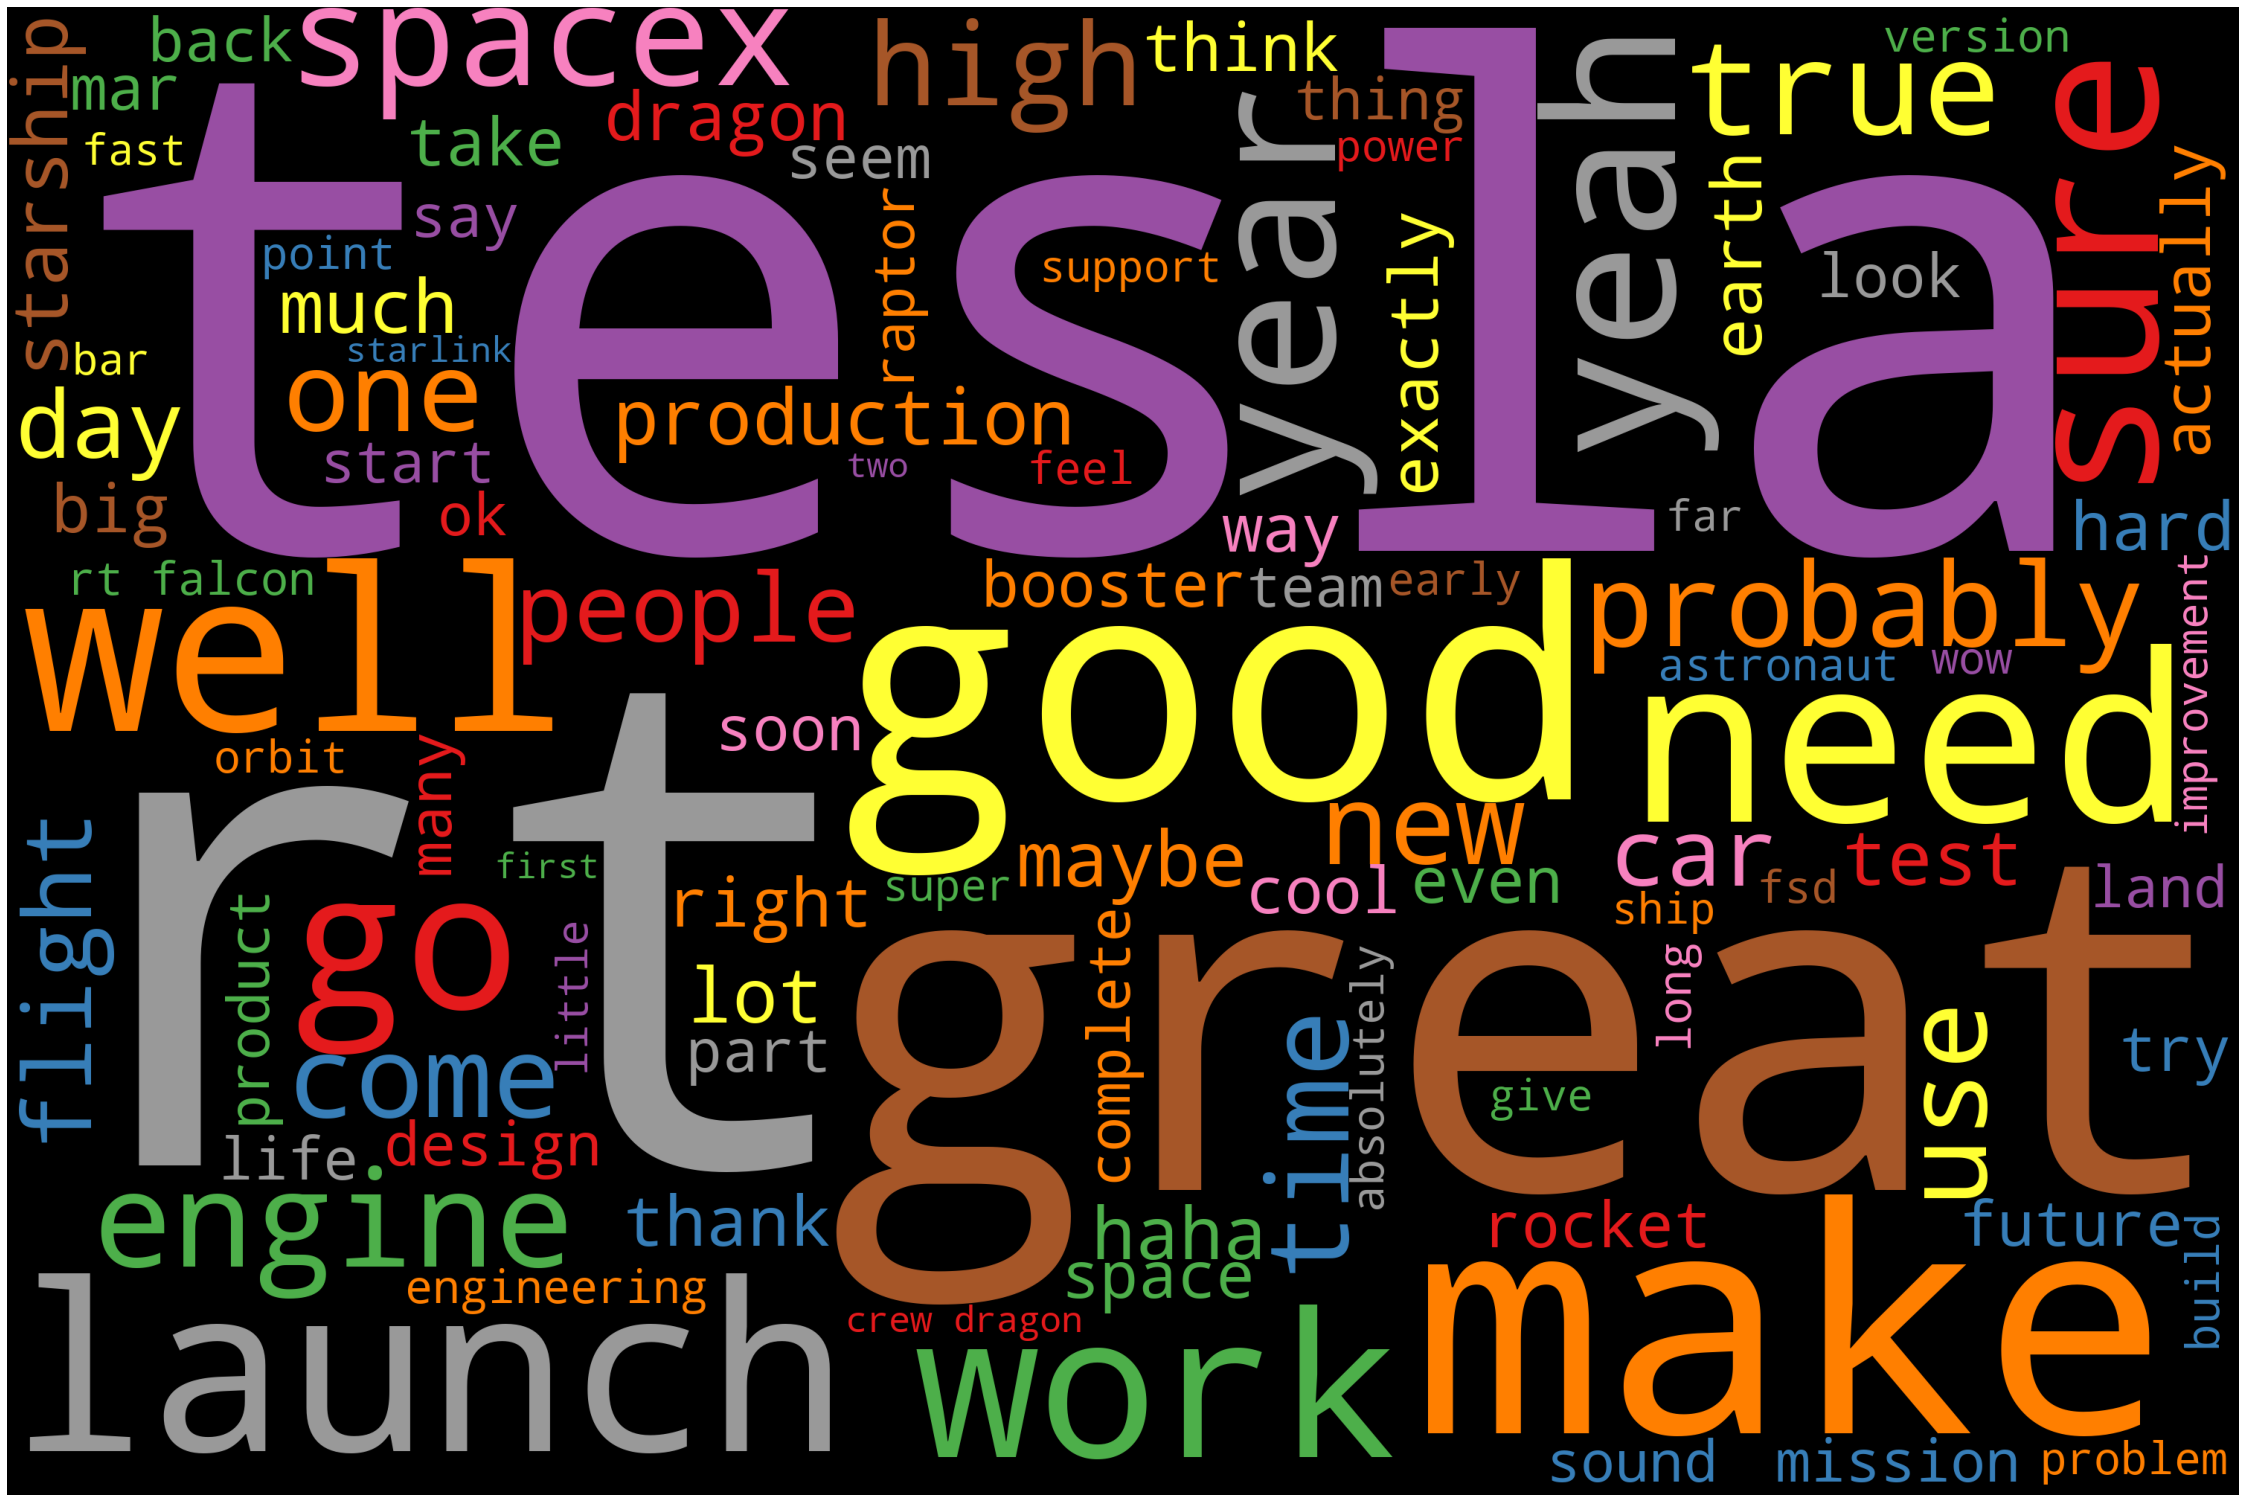

In [30]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(clean_text)
# Plot
plot_cloud(wordcloud)

# NER 

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [32]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = clean_text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [33]:
for token in doc_block[100:300]:
    print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ
1 NUM
orb

In [34]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:300])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need', 'land', 'become', 'meme', 'destroyer

In [35]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,tesla,76
1,make,64
2,launch,62
3,year,49
4,work,49
5,need,48
6,go,43
7,come,42
8,day,38
9,get,37


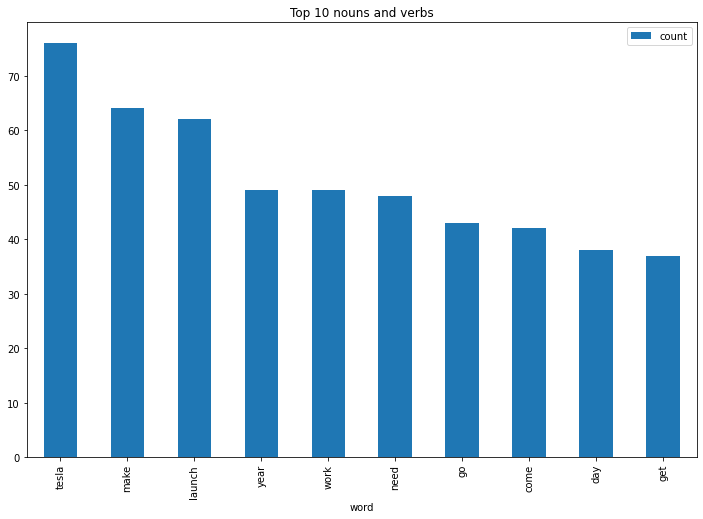

In [36]:
## Visualizing results
#Barchart for top 10 nouns + verbs

wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining

In [37]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(text))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [38]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [39]:
# Sentiment Analysis

afinn=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [40]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [41]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
# test that it works
calculate_sentiment(text='great')

3

In [44]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [45]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
224,"@PPathole @karpathy For a second there, I thou...",11,69
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
719,We just havent observed the https://t.co/mez...,17,72


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [48]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [49]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0].head()

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38


In [50]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

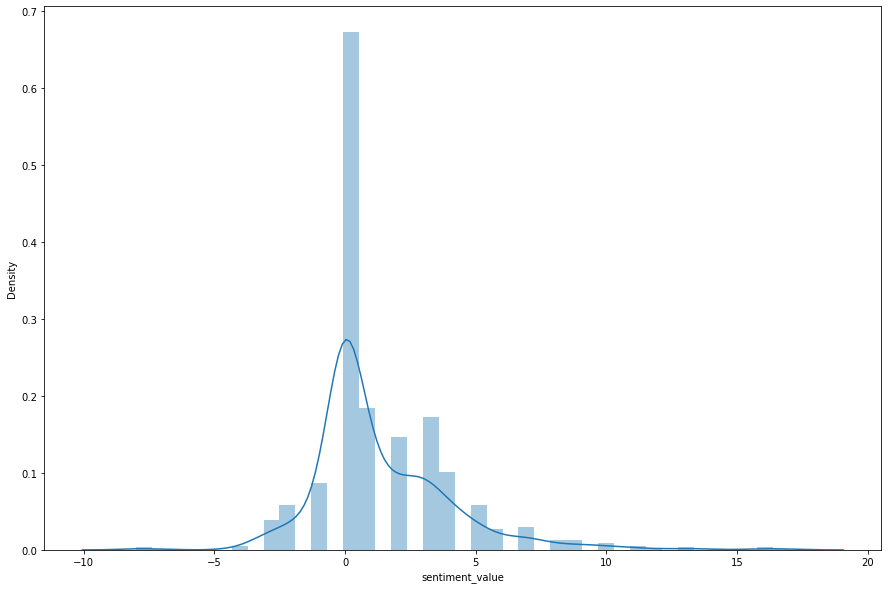

In [51]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

Since this displot shows that the data is slightly driven on the positive side meaning a slight right skewness can be seen through the values, which gives us a ides of a higher positive sentiment in the text

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

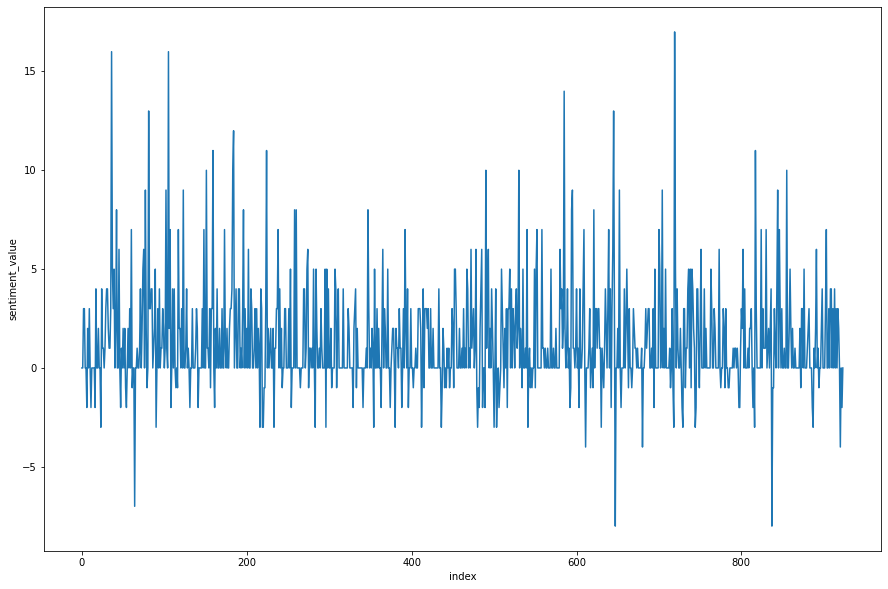

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

this makes the above statement more clear since all the data mostly lie more on the positive side meaning above 0 and  the are some indexes we can see very negative as well positive sentiments but on the opposite ends to each other

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

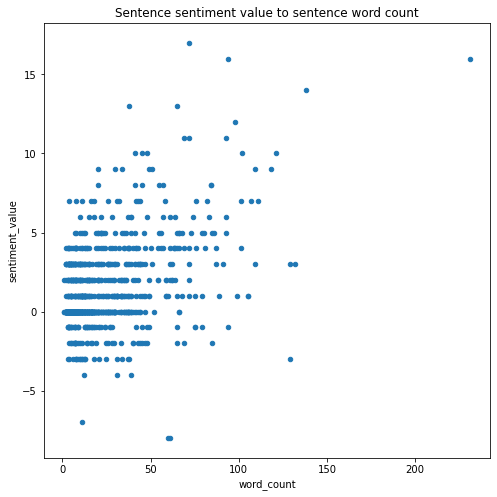

In [53]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

This tell us that the data we have has more positive sentiments in a wordcount from 0 to 150 than negative sentiments still being there but not with a big spread like the positive sentiment data